In [1]:
import torch
import torch.nn as nn

from llama import RoPE

In [2]:
batch_size = 100
max_seq = 5
embed_dim=64

token_embedding = nn.Embedding(22, embed_dim)
tokens = torch.randint(0, 22, (batch_size,max_seq))
x = token_embedding(tokens)
rope = RoPE(max_seq, embed_dim)
y = rope(x)

In [3]:
print(x.shape, y.shape, rope.freqs_complex.dtype)

torch.Size([100, 5, 64]) torch.Size([100, 5, 64]) torch.complex64


In [4]:
import matplotlib.pyplot as plt

def vis_rope(data):    
    plt.figure(figsize=(8, 8))

    for dim_idx in range(data.shape[2]):
        real_parts = data[0, :, dim_idx].real
        imag_parts = data[0, :, dim_idx].imag
        plt.plot(real_parts, imag_parts, linewidth=1)
        # plt.scatter(real_parts[0], imag_parts[0], color='red', s=100, label='Start')
        # plt.scatter(real_parts[-1], imag_parts[-1], color='blue', s=100, label='End')
    
    plt.xlabel("Real part")
    plt.ylabel("Imaginary part")
    plt.title("Complex plane visualization")
    plt.grid(True)
    plt.show()

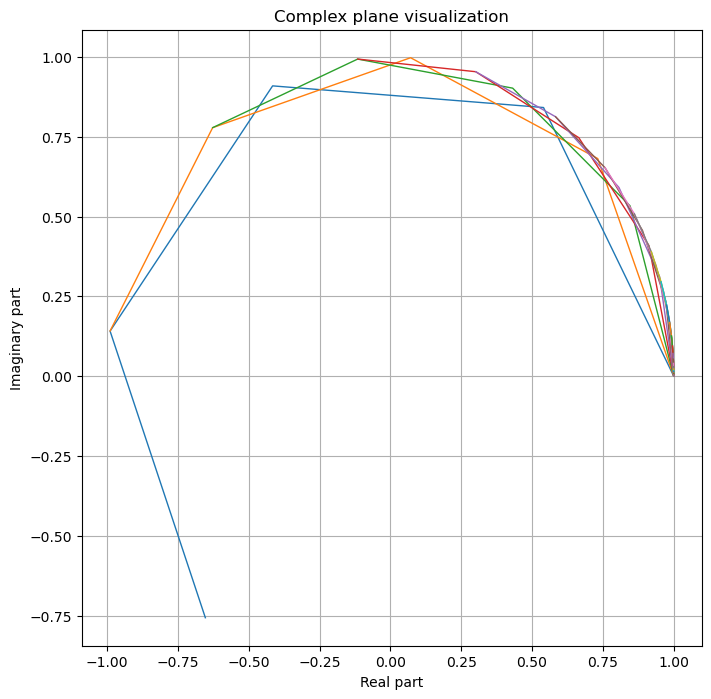

In [5]:
vis_rope(rope.freqs_complex)